Perform EDA on below insurance dataset
Link: https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health

Perform All steps of EDA and document conclusions and then perform feature engineering.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('insurance_data.csv')

In [8]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [9]:
df=df.drop(columns=['index','PatientID'])

In [10]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1335 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1337 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


### Column Types

- **Numerical** - Age,claim,children,bmi,bloodpressure
- **Categorical** - gender, smoker, region, diabetic

### Age

**conclusions**

- Age is normally(almost) distributed
- 29% of the values are missing

In [13]:
df['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

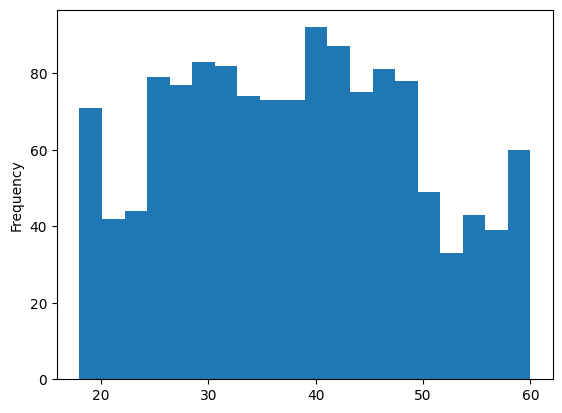

In [14]:
df['age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

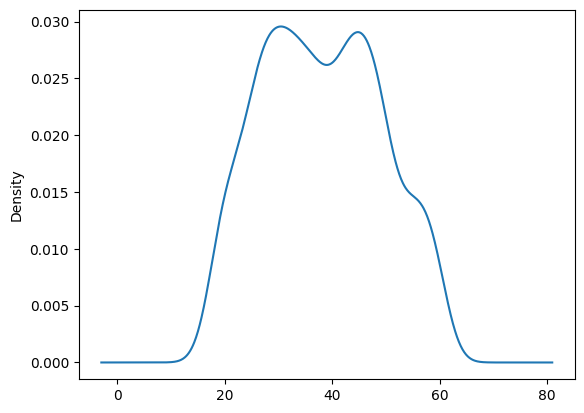

In [15]:
df['age'].plot(kind='kde')

In [16]:
df['age'].skew()

0.11361133741072633

<Axes: >

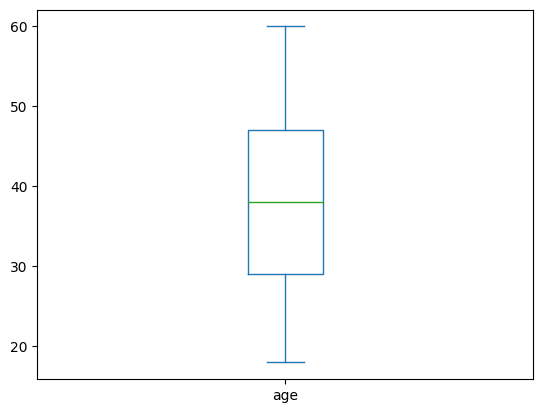

In [17]:
df['age'].plot(kind='box')

In [19]:
df['age'].isnull().sum()/len(df['age'])

0.0037313432835820895

### bmi

**conclusions**

- The data is normally distributed.
-  There are some outliers

In [20]:
df['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

<Axes: ylabel='Density'>

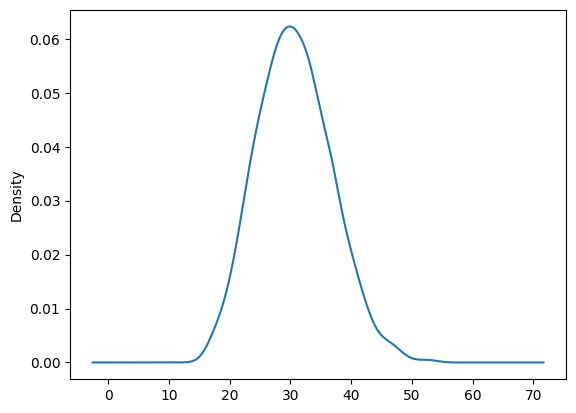

In [21]:
df['bmi'].plot(kind='kde')

In [22]:
df['bmi'].skew()

0.28597245020808587

<Axes: >

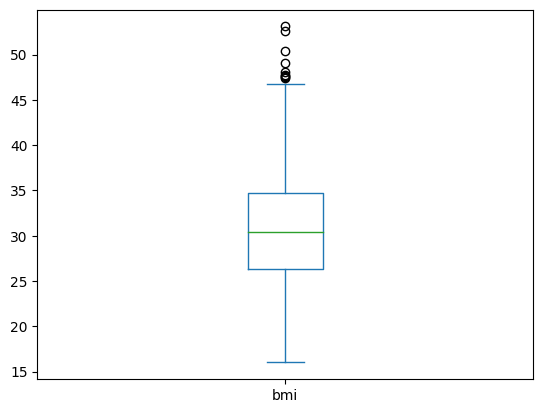

In [23]:
df['bmi'].plot(kind='box')

In [24]:
df[df['bmi']>47]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
9,30.0,male,53.1,97,No,0,No,northwest,1163.46
141,46.0,male,50.4,89,Yes,1,No,southeast,2438.06
579,25.0,male,47.5,84,Yes,1,No,southeast,8083.92
675,49.0,female,48.1,81,Yes,2,No,northeast,9432.93
696,49.0,male,47.7,88,No,1,No,southeast,9748.91
802,42.0,male,49.1,109,Yes,0,No,southeast,11381.33
1299,50.0,male,52.6,110,No,1,Yes,southeast,44501.40
1306,43.0,female,47.6,112,Yes,2,Yes,southwest,46113.51
1339,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


In [25]:
df['bmi'].isnull().sum()

0

### bloodpressure

**conclusions**

- bloodpressure is normally(almost) distributed
- many outliers are there.

In [27]:
df['bloodpressure'].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

<Axes: ylabel='Density'>

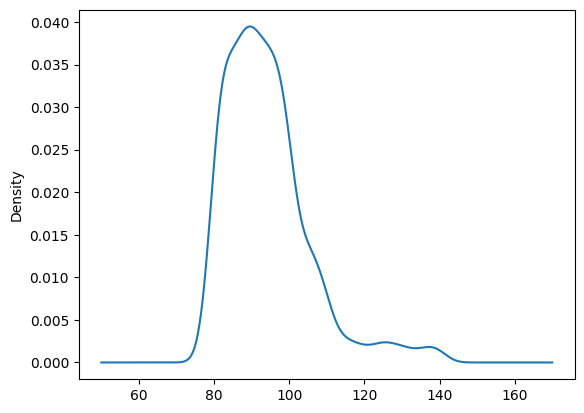

In [28]:
df['bloodpressure'].plot(kind='kde')

In [29]:
df['bloodpressure'].skew()

1.4835342102293079

<Axes: >

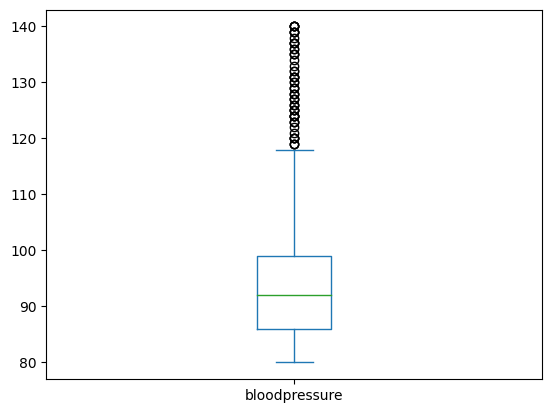

In [30]:
df['bloodpressure'].plot(kind='box')

In [31]:
df[df['bloodpressure']>119]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1147,29.0,female,32.7,128,Yes,2,No,northwest,26018.95
1150,55.0,female,27.1,135,No,1,No,southwest,26140.36
1152,38.0,female,35.9,128,No,1,No,northeast,26392.26
1153,43.0,male,36.8,126,No,2,No,northwest,26467.10
1154,31.0,male,23.8,126,Yes,0,Yes,southeast,26926.51
1156,46.0,female,23.0,137,Yes,0,Yes,southeast,27037.91
1161,22.0,male,22.4,137,Yes,2,No,northeast,27375.90
1166,23.0,male,26.7,123,Yes,0,Yes,northeast,28101.33
1169,27.0,male,36.7,130,No,1,No,northwest,28468.92
1174,44.0,female,29.1,139,No,0,Yes,northwest,29141.36


In [32]:
df['bloodpressure'].isnull().sum()

0

### claim

**conclusions**

- claim is positively skewness.
- many outliers are there.

In [33]:
df['claim'].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

<Axes: ylabel='Density'>

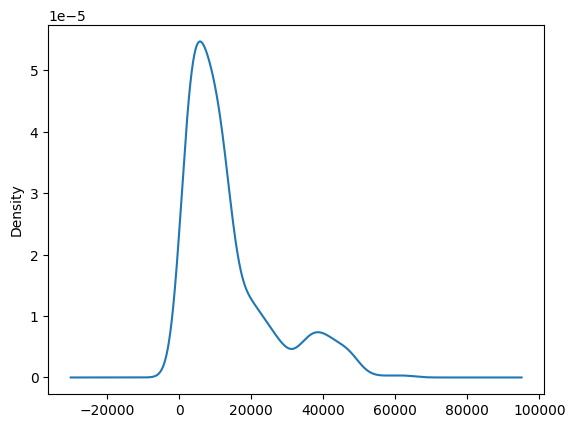

In [34]:
df['claim'].plot(kind='kde')

In [35]:
df['claim'].skew()

1.5167468509489237

<Axes: >

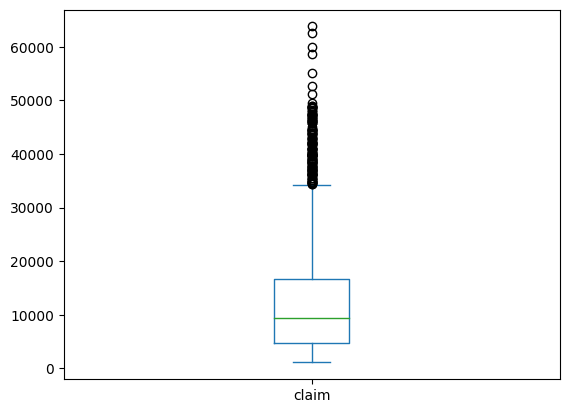

In [36]:
df['claim'].plot(kind='box')

In [37]:
df[df['claim']>35000]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1207,22.0,male,22.9,80,No,0,Yes,northeast,35069.37
1208,23.0,male,28.5,106,No,0,Yes,northeast,35147.53
1209,32.0,female,26.8,107,No,1,No,southwest,35160.13
1210,25.0,male,30.8,140,Yes,0,Yes,southwest,35491.64
1211,22.0,male,35.6,97,Yes,0,Yes,southwest,35585.58
...,...,...,...,...,...,...,...,...,...
1335,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


**Conclusions**

-Some basic statistical values of the dataset. "children" is an ordinal data.

-That's why we should not include this col here.

-The "age" looks fine. Although average bmi is 30 which indicates that most of people lies within overweight to obesity. But after looking the max value, can say that the mean is manipulated by the outliers. For bloodpressure, the gap between Q3 and max is huge compared to others. Maybe there are some high value outliers or data is right skewed. Same thing insurance "claim" col.

In [38]:
df[["age", "bmi", "bloodpressure", "claim"]].describe()

,age,bmi,bloodpressure,claim
count,1335.000000,1340.000000,1340.000000,1340.000000
mean,38.078652,30.668955,94.157463,13252.745642
std,11.102924,6.106735,11.434712,12109.609288
min,18.000000,16.000000,80.000000,1121.870000
25%,29.000000,26.275000,86.000000,4719.685000
50%,38.000000,30.400000,92.000000,9369.615000
75%,47.000000,34.700000,99.000000,16604.305000
max,60.000000,53.100000,140.000000,63770.430000


In [40]:
# we can categorize the bmi values

def bmi(value):
  if pd.isna(value):
    return np.nan
  
  if value < 18.5:
    return "Underweight"
  elif value >= 18.5 and value < 25:
    return "Normal"
  elif value >= 25 and value <=30:
    return "Overweight"
  elif value >=30:
    return "Obesity"
  else:
    return value
df['bmi_cat'] = df['bmi'].apply(lambda x: bmi(x)).copy()

<Axes: title={'center': 'BMI categories'}, ylabel='bmi_cat'>

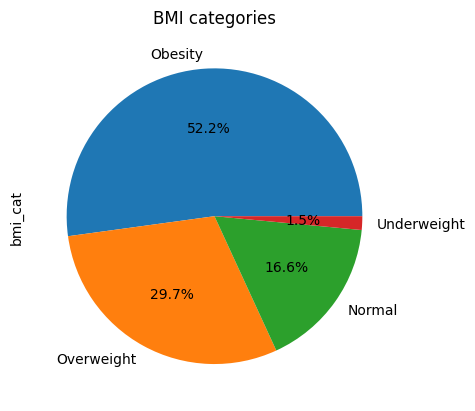

In [42]:
df['bmi_cat'].value_counts().plot(kind='pie',title='BMI categories',autopct='%0.1f%%')

Only 16.64% is under normal.obesity is more than the overweight which is also weried.



<Axes: title={'center': 'Avg. insurance claim by bmi categories'}, xlabel='bmi_cat'>

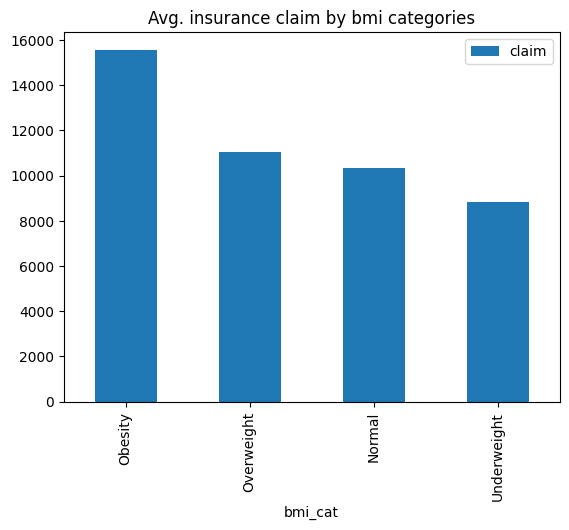

In [46]:
df.groupby(by='bmi_cat')['claim'].mean().reset_index().sort_values(by='claim',ascending=False).plot(kind='bar',title='Avg. insurance claim by bmi categories',x='bmi_cat')

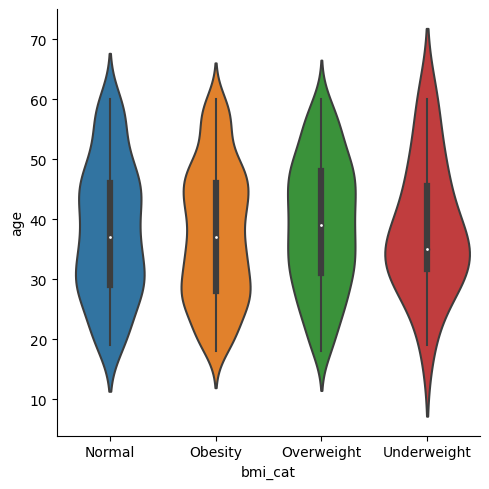

In [47]:
# let's see the distribution of "age" for each BMI category
sns.catplot(x='bmi_cat',y='age',data=df,kind='violin')

In [48]:
# categorize the blood-pressure also.
def bloodpressure_cat(value):
  if pd.isna(value):
    return np.nan

  if value < 120:
    return "Normal"
  elif value >= 120 and value < 130:
    return "Elevated"
  elif value >= 130 and value < 140:
    return "Hbp-Stage1"
  elif value >=140 and value < 180:
    return "Hbp-Stage2"
  elif value >=180:
    return "Hypertensive_crisis"
  else:
    return value
df['bloodpressure_cat']=df['bloodpressure'].apply(lambda x: bloodpressure_cat(x)).copy()

In [53]:
df.pivot_table(values=['age','claim'],index='bloodpressure_cat',columns='bmi_cat')

age                                           claim  \
bmi_cat               Normal    Obesity Overweight Underweight        Normal   
bloodpressure_cat                                                              
Elevated           31.000000  38.464286  23.000000         NaN  26926.510000   
Hbp-Stage1         34.000000  37.277778  43.250000         NaN  27206.905000   
Hbp-Stage2               NaN  39.000000        NaN         NaN           NaN   
Normal             38.086364  37.497667  39.025445        38.5  10111.878182   

                                                           
bmi_cat                 Obesity    Overweight Underweight  
bloodpressure_cat                                          
Elevated           39617.565714  28101.330000         NaN  
Hbp-Stage1         39436.772222  30946.827500         NaN  
Hbp-Stage2         38323.496000           NaN         NaN  
Normal             13687.114830  10798.400356   8852.2015

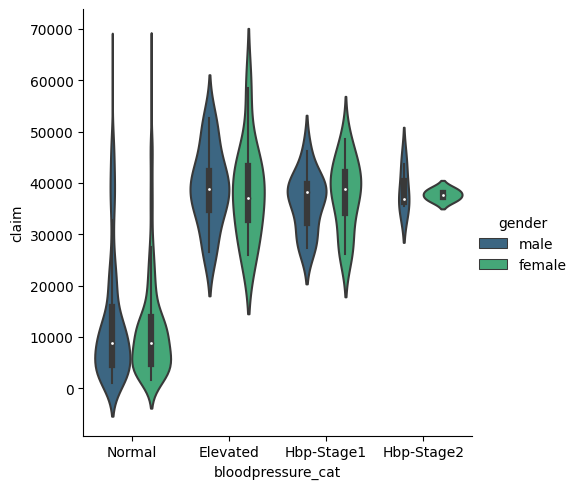

In [55]:
sns.catplot(x='bloodpressure_cat',y='claim',data=df,hue='gender',kind='violin',palette='viridis')

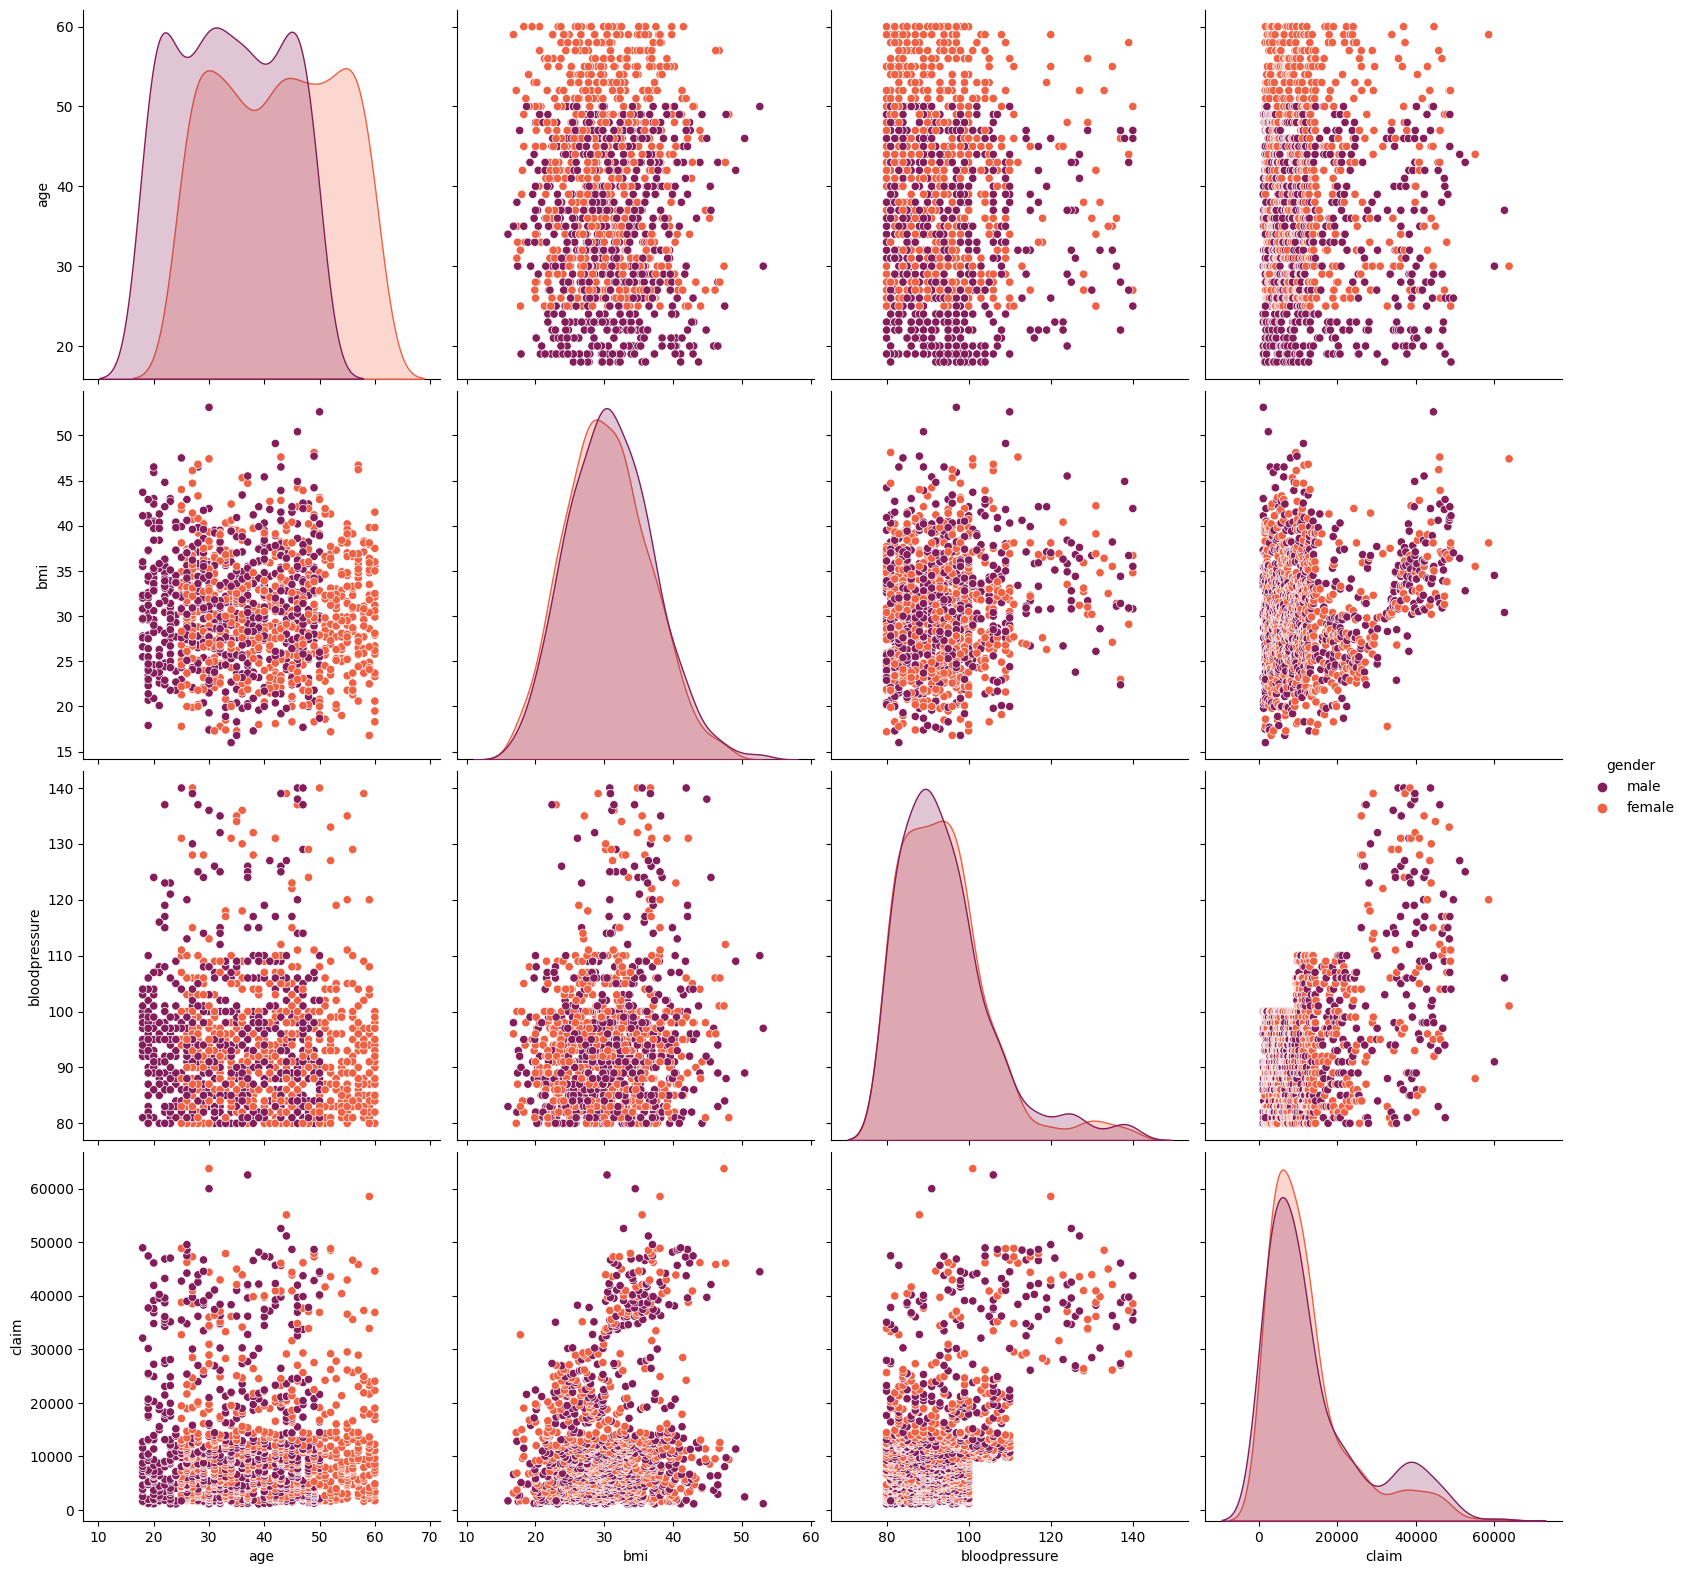

In [56]:
sns.pairplot(
    data=df, 
    hue="gender", 
    vars=["age", "bmi", "bloodpressure", "claim"], 
    height=4, 
    aspect=1,
    palette = "rocket"
)

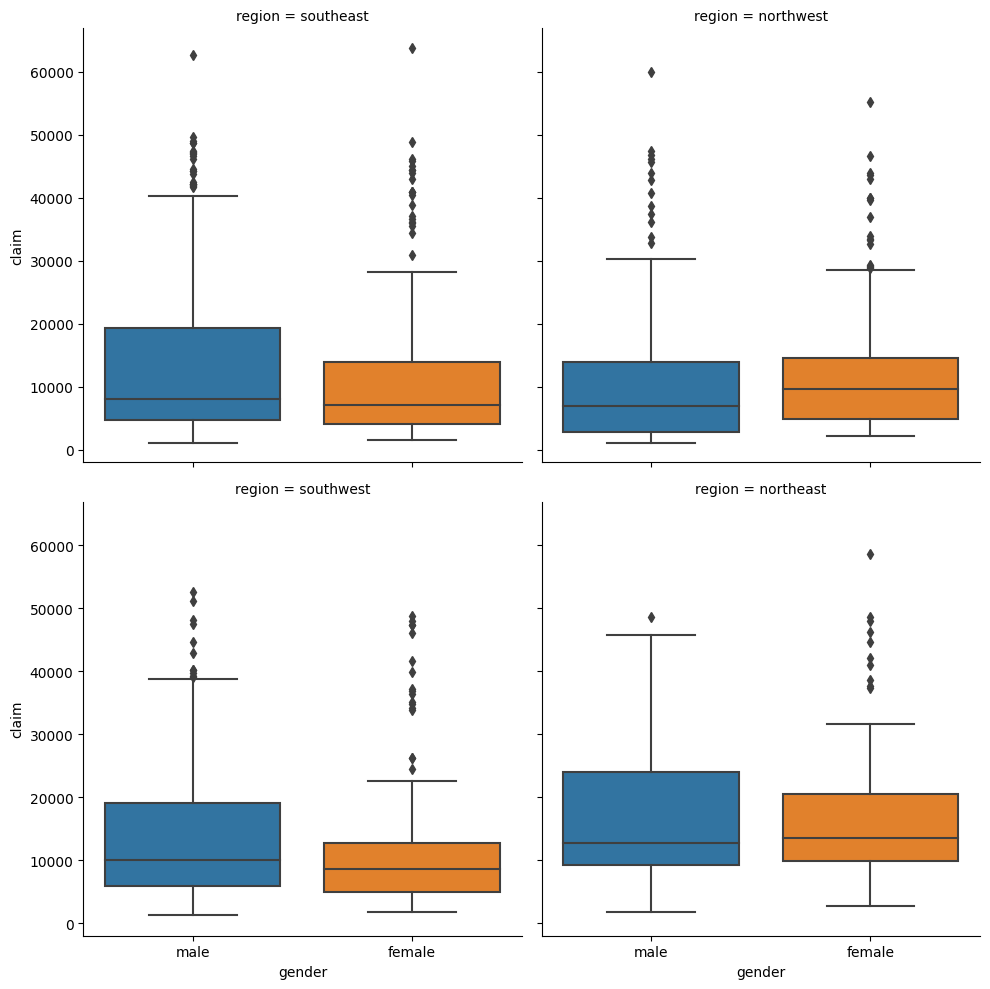

In [57]:
sns.catplot(data=df.dropna(), x="gender", y='claim', col="region", kind='box', col_wrap=2)

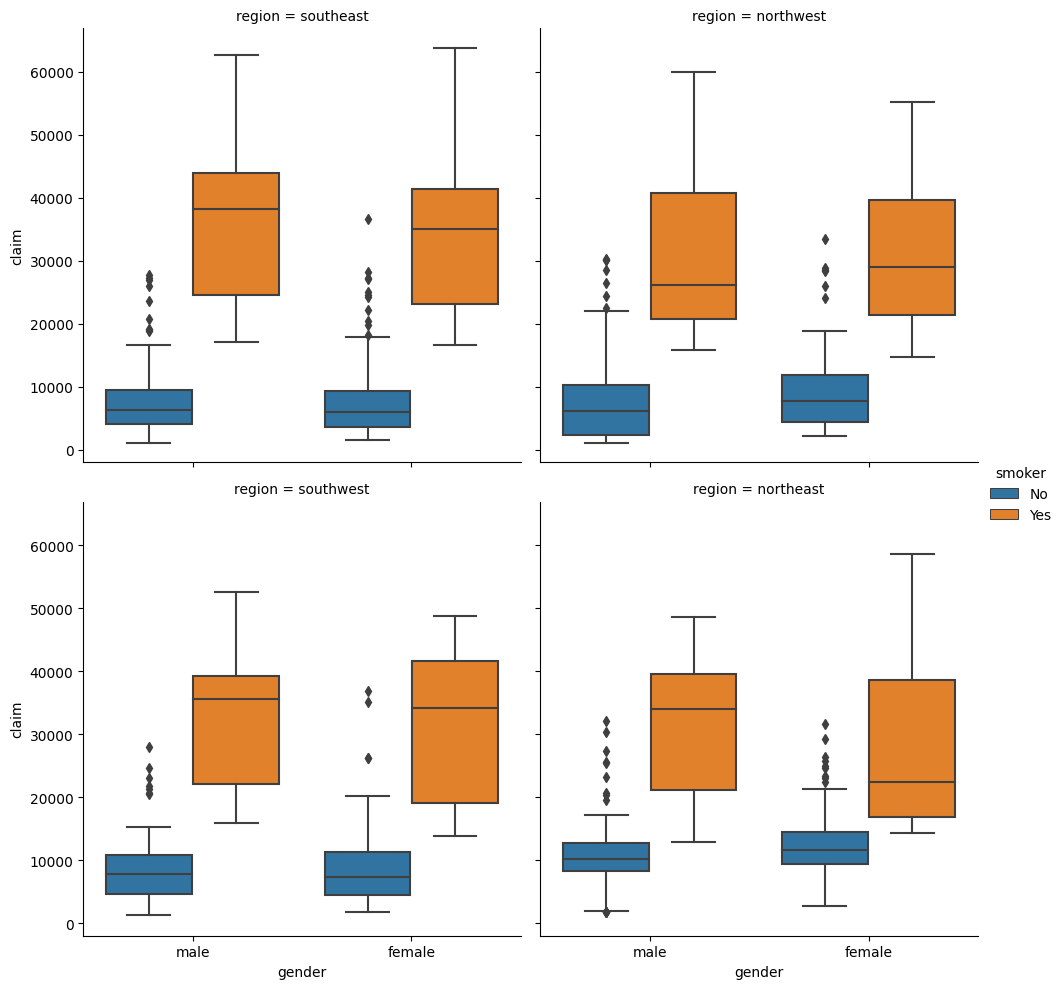

In [59]:
sns.catplot(data=df.dropna(), x="gender", y='claim', col="region",hue='smoker', kind='box', col_wrap=2)

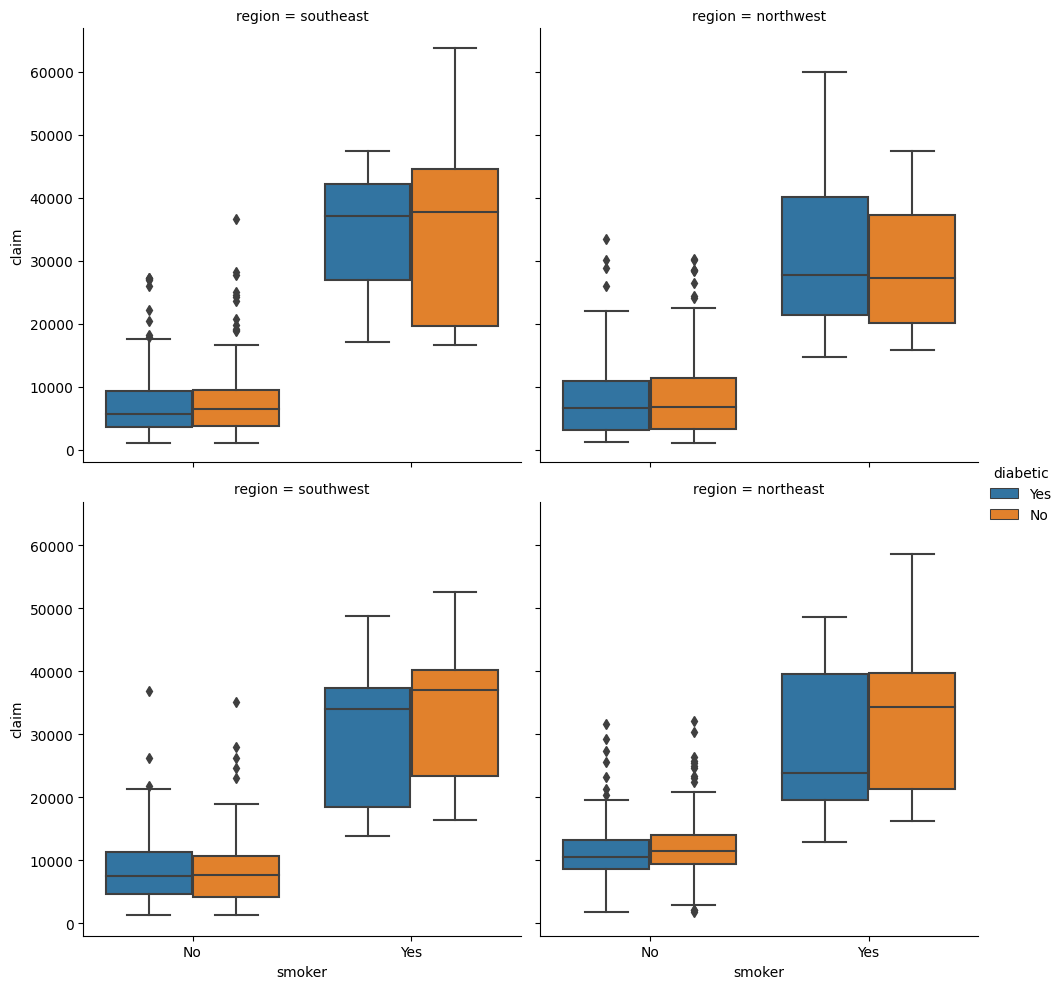

In [60]:
sns.catplot(data=df.dropna(), x="smoker", y='claim', col="region",hue='diabetic', kind='box', col_wrap=2)